## Part 3 - Modelling

This workbook is 3 out of 3 parts of a prediction model to determine the occurrence of West Nile Virus (WNV). The focus of this part is to perform modelling on the combined dataset for train and weather that will be fed to the model

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, precision_recall_curve,average_precision_score, PrecisionRecallDisplay, auc
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train_weather_df = pd.read_csv('../datasets/train_weather_model.csv')

In [4]:
train_weather_df.head()

,Date,AddressAccuracy,WnvPresent,Day,Month,Year,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,br,dz,fg,hz,ra,ts,tsra,vcts,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31,cluster_32,cluster_33,cluster_34,cluster_35,cluster_36,cluster_37,cluster_38,cluster_39,cluster_40,cluster_41,cluster_42,cluster_43,cluster_44,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,cluster_58,cluster_59,cluster_60
0,2007-05-29,9,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,9,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,9,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,8,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,8,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
train_weather_df['Date']=pd.to_datetime(train_weather_df['Date'])
train_weather_df.set_index('Date', inplace=True)

In [6]:
train_weather_df.head()

,AddressAccuracy,WnvPresent,Day,Month,Year,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,br,dz,fg,hz,ra,ts,tsra,vcts,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31,cluster_32,cluster_33,cluster_34,cluster_35,cluster_36,cluster_37,cluster_38,cluster_39,cluster_40,cluster_41,cluster_42,cluster_43,cluster_44,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,cluster_58,cluster_59,cluster_60
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-29,9,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-05-29,9,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-05-29,9,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-05-29,8,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-05-29,8,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Set X and y variables/ Train test split

In [7]:
# Set X and y variables

X=train_weather_df.drop('WnvPresent',axis=1)
y=train_weather_df['WnvPresent']

#Train test split
X_train, X_test, y_train,y_test =train_test_split(
    X,
    y,
    stratify=y,
    random_state=50
)

In [8]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)
y_train.value_counts(normalize=True)

(7800,)
(2600,)
(7800, 90)
(2600, 90)


0    0.947051
1    0.052949
Name: WnvPresent, dtype: float64

In [9]:
ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

In [10]:
# Instantiate model.
logreg = LogisticRegression(max_iter = 5_000)

# Fit model.
logreg.fit(X_train_sc, y_train)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Intercept: [-4.36822297]
Logistic Regression Coefficient: [[ 3.42456997e-02  2.56802111e-01  2.26834255e+00  3.51992372e-01
   5.90846211e-01  5.66094555e-01  4.57733687e-01 -2.12054446e+00
  -4.15546383e-02  4.30231127e-01 -4.03485836e-02  5.79233690e-01
   9.33957075e-01  8.96205951e-01 -3.17982099e-01  3.69763279e-01
   2.07026974e-01 -5.22809682e-01  8.07773284e-02  6.74595658e-01
   2.95122416e-01 -1.98881434e-01  1.25548144e-01 -8.60760569e-02
  -2.54150111e-01  1.98872695e-01  3.80343241e-01 -5.27144178e-03
   1.02049836e+00  1.08152858e+00  5.98501655e-01  7.14298138e-02
  -4.35277003e-02  2.14189907e-02 -8.13357185e-02 -2.24719837e-01
  -4.74177178e-02  3.19797060e-02 -1.18728065e-01 -4.29591357e-02
  -1.14489173e-01 -7.52076076e-04 -1.63743593e-01 -9.35813604e-02
  -1.37656210e-01 -2.32109738e-01  1.12785936e-02  2.45020720e-03
   4.17584241e-02 -2.30948145e-01 -1.34446404e-01 -1.46499095e-01
  -8.99774794e-02 -6.41064529e-02 -5.22160162e-02 -1.24786128e-0

In [11]:
# Generate predicted values.
logreg.predict(X_test_sc)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
# Step 4 (part 2): Generate predicted probabilities.
np.round(logreg.predict_proba(X_test_sc), 3)

array([[0.978, 0.022],
       [0.945, 0.055],
       [0.998, 0.002],
       ...,
       [0.946, 0.054],
       [0.981, 0.019],
       [0.96 , 0.04 ]])

In [13]:
logreg.score(X_train_sc, y_train)

0.9470512820512821

In [14]:
# Step 5: Evaluate model.
logreg.score(X_test_sc, y_test)
#accuracy

0.9473076923076923

C:\Users\rashi\Anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


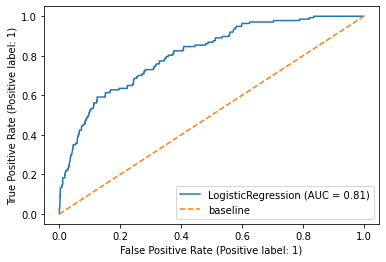

In [15]:
plot_roc_curve(logreg, X_test_sc, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

C:\Users\rashi\Anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


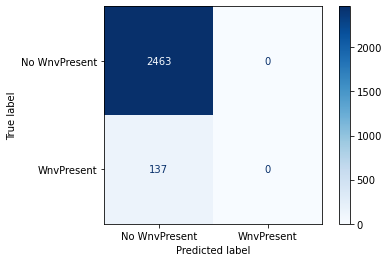

In [16]:
plot_confusion_matrix(logreg, X_test_sc, y_test, cmap='Blues', 
                      values_format='d', display_labels=['No WnvPresent', 'WnvPresent']);

## PCA Logistic Regression (with SMOTE)

Noted that this is an unbalanced problem that we are dealing with, and the vanilla logistic regression is mostly predicting for No WNV present. As such, we will be implementing SMOTE to help deal with this unabalance.

In [17]:
# Creating a pipeline model for StandardScaler, SMOTE, PCA and Logistic Regression
pipe_pca_logreg = Pipeline([
                ('sampling', SMOTE(random_state=100)),
                 ('pca', PCA(random_state=100)),
                 ('logreg', LogisticRegression(solver='liblinear', random_state=100))
                ])

In [18]:
# pipe_pca_logreg_params = {
#     'logreg__penalty': ['l1','l2'],
#     'logreg__C': [1, 1.5, 2],
#     'pca__n_components': [21,22,23,24],
#     'sampling__sampling_strategy': ['minority', 'not minority', 'auto'],
#     'sampling__k_neighbors': [3, 5],
# }

pipe_pca_logreg_params = {
    'logreg__penalty': ['l1'],
    'logreg__C': [1],
    'pca__n_components': [23],
    'sampling__sampling_strategy': ['auto','minority'],
    'sampling__k_neighbors': [13],
}

In [19]:
gs_pca_logreg = GridSearchCV(pipe_pca_logreg, pipe_pca_logreg_params, verbose=2, n_jobs=-1)

In [20]:
%%time
gs_pca_logreg.fit(X_train_sc, y_train) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 1.62 s
Wall time: 1.87 s


GridSearchCV(estimator=Pipeline(steps=[('sampling', SMOTE(random_state=100)),
                                       ('pca', PCA(random_state=100)),
                                       ('logreg',
                                        LogisticRegression(random_state=100,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [1], 'logreg__penalty': ['l1'],
                         'pca__n_components': [23],
                         'sampling__k_neighbors': [13],
                         'sampling__sampling_strategy': ['auto', 'minority']},
             verbose=2)

In [28]:
# for sorting out later, to confirm how we want to present modeling
preds = gs_pca_logreg.predict(X_test_sc)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
acc = (tp + tn) / (tn + fp + fn + tp)
misclass = 1 - acc
#sens = tp / (tp + fn)
#spec = tn / (tn + fp)
#prec = tp / (tp + fp)
#f_one_score = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, gs_pca_logreg.predict_proba(X_test_sc)[:,1])
#pr_score = average_precision_score(y_test, gs_pca_logreg.predict_proba(X_test_sc)[:,1])

In [29]:
acc

0.6684615384615384

In [30]:
misclass

0.33153846153846156

In [31]:
roc_auc

0.7330876534758217

C:\Users\rashi\Anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rashi\Anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


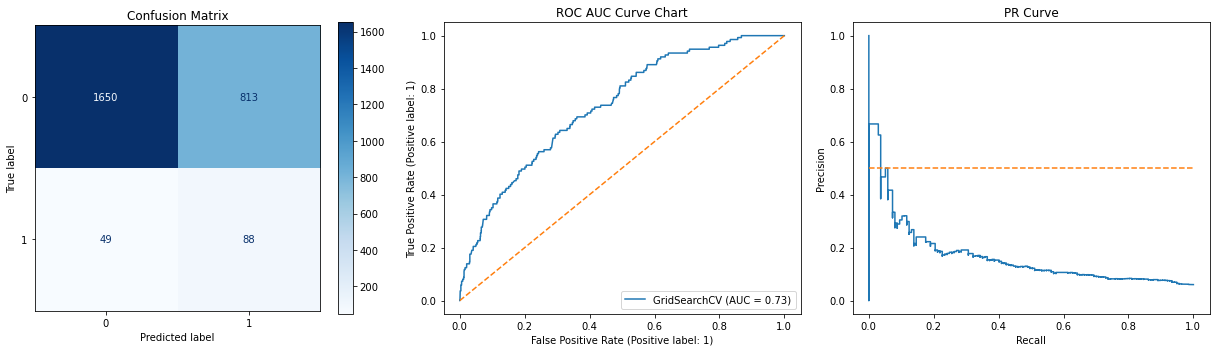

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(17,5))
    
cm_chart = plot_confusion_matrix(gs_pca_logreg, X_test_sc, y_test, cmap='Blues', values_format='d', ax=axes[0]);
axes[0].title.set_text('Confusion Matrix')
# cm_chart = plot_confusion_matrix(gs_pca_logreg, X_test_sc, y, cmap='Blues', values_format='d',display_labels=['WNV Not Present (0)','WNV Present (1)'], ax=axes[0]);
roc_curve = plot_roc_curve(gs_pca_logreg, X_test_sc, y_test, ax=axes[1])
axes[1].plot([0, 1], [0, 1], label='baseline', linestyle='--' )
axes[1].title.set_text('ROC AUC Curve Chart')
precision, recall, thresholds = precision_recall_curve(y_test, gs_pca_logreg.predict_proba(X_test_sc)[:,1])
pr_curve = PrecisionRecallDisplay(precision=precision, recall=recall)#(gs_pca_logreg, X_test_sc, y, ax=axes[2])
pr_curve.plot(ax=axes[2])
#    axes[2].plot([min(thresholds),max(thresholds)], [min(thresholds),max(thresholds)], label='threshold', linestyle='--')
axes[2].plot([0, 1], [0.5, 0.5],label='baseline', linestyle='--' )
axes[2].title.set_text('PR Curve')
fig.tight_layout()